In [15]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -------- ------------------------------- 61.4/294.9 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# CSV 불러오기
df = pd.read_csv("../../Big_data_sets/big_data_set1_f.csv", encoding='cp949')

## 폐업여부 열 추가

In [23]:
# 폐업여부 컬럼 추가
df["폐업여부"] = df["MCT_ME_D"].notna().astype(int)

# 새로운 파일로 저장
df.to_csv("big_data_set1_with_flag.csv", index=False)


## 업종별 폐업률 확인 (폐업률 높은 순, 업체 많은 순 csv 파일 생성)

유의미한 차이를 발견하지 못하였음(발견할 만큼의 데이터량이 아닌 것 같기도...)

In [ ]:
# 업종별 집계
업종별_폐업 = (
    df.groupby("HPSN_MCT_ZCD_NM")["폐업여부"]
      .agg(총업체수="count", 폐업수="sum")
      .reset_index()
)

# 폐업률 계산 (퍼센트로 보기 좋게 변환)
업종별_폐업["폐업률(%)"] = (업종별_폐업["폐업수"] / 업종별_폐업["총업체수"] * 100).round(2)

# 폐업률 높은 순 정렬
업종별_폐업_rate = 업종별_폐업.sort_values(by="폐업률(%)", ascending=False)
업종별_폐업_rate.to_csv("업종별_폐업률_정렬_폐업률순.csv", index=False, encoding="cp949")

# 총업체수 많은 순 정렬
업종별_폐업_count = 업종별_폐업.sort_values(by="총업체수", ascending=False)
업종별_폐업_count.to_csv("업종별_폐업률_정렬_업체수순.csv", index=False, encoding="cp949")

## 여러가지 비교 가능한 특징들 분석

### 업종, 상권, 오픈연도, 운영기간, 가맹점 여부 별 폐업률

In [32]:
# 폐업여부 (0=운영중, 1=폐업)
df["폐업여부"] = df["MCT_ME_D"].notna().astype(int)

# 오픈일 처리
df["오픈일"] = pd.to_datetime(df["ARE_D"], format="%Y%m%d", errors="coerce")
df["폐업일"] = pd.to_datetime(df["MCT_ME_D"], format="%Y%m%d", errors="coerce")

# 운영기간 계산 (운영중이면 오늘 날짜 기준)
df["기준일"] = df["폐업일"].fillna(pd.to_datetime("today"))
df["운영기간(일)"] = (df["기준일"] - df["오픈일"]).dt.days

# 오픈연도 뽑기
df["오픈연도"] = df["오픈일"].dt.year

# 1️⃣ 업종별 폐업률
업종별 = (
    df.groupby("HPSN_MCT_ZCD_NM")["폐업여부"]
      .agg(총업체수="count", 폐업수="sum")
      .reset_index()
)
업종별["폐업률(%)"] = (업종별["폐업수"] / 업종별["총업체수"] * 100).round(2)

# 2️⃣ 상권별 폐업률
상권별 = (
    df.groupby("HPSN_MCT_BZN_CD_NM")["폐업여부"]
      .agg(총업체수="count", 폐업수="sum")
      .reset_index()
)
상권별["폐업률(%)"] = (상권별["폐업수"] / 상권별["총업체수"] * 100).round(2)

# 3️⃣ 오픈연도별 폐업률
df["오픈연도"] = df["오픈일"].dt.year
연도별 = (
    df.groupby("오픈연도")["폐업여부"]
      .agg(총업체수="count", 폐업수="sum")
      .reset_index()
)
연도별["폐업률(%)"] = (연도별["폐업수"] / 연도별["총업체수"] * 100).round(2)

# 4️⃣ 운영기간 비교 (운영중 vs 폐업)
운영기간비교 = df.groupby("폐업여부")["운영기간(일)"].mean().reset_index()
운영기간비교["운영기간(년)"] = (운영기간비교["운영기간(일)"] / 365).round(1)

# 5️⃣ 가맹점 vs 비가맹점 비교 (가맹점 구분번호가 있으면 1, 없으면 0)
df["가맹점여부"] = df["MCT_BRD_NUM"].notna().astype(int)
가맹점별 = (
    df.groupby("가맹점여부")["폐업여부"]
      .agg(총업체수="count", 폐업수="sum")
      .reset_index()
)
가맹점별["폐업률(%)"] = (가맹점별["폐업수"] / 가맹점별["총업체수"] * 100).round(2)

# ✅ 결과 확인
print("업종별 폐업률\n", 업종별.head(), "\n")
print("상권별 폐업률\n", 상권별.head(), "\n")
print("연도별 폐업률\n", 연도별.head(), "\n")
print("운영기간 비교\n", 운영기간비교, "\n")
print("가맹점별 폐업률\n", 가맹점별, "\n")


업종별 폐업률
   HPSN_MCT_ZCD_NM  총업체수  폐업수  폐업률(%)
0            건강식품    12    0     0.0
1             건강원     9    0     0.0
2             건어물     2    0     0.0
3       구내식당/푸드코트     2    1    50.0
4            기사식당     1    0     0.0 

상권별 폐업률
   HPSN_MCT_BZN_CD_NM  총업체수  폐업수  폐업률(%)
0               건대입구     1    0    0.00
1               금남시장   249    7    2.81
2                답십리   179    6    3.35
3         동대문역사문화공원역     1    0    0.00
4                 뚝섬   468    9    1.92 

연도별 폐업률
    오픈연도  총업체수  폐업수  폐업률(%)
0  1990     1    0     0.0
1  1991     1    0     0.0
2  1994     1    0     0.0
3  1995     1    0     0.0
4  1996     4    0     0.0 

운영기간 비교
    폐업여부      운영기간(일)  운영기간(년)
0     0  2552.377526      7.0
1     1  1656.685039      4.5 

가맹점별 폐업률
    가맹점여부  총업체수  폐업수  폐업률(%)
0      0  3643  111    3.05
1      1   542   16    2.95 



C:\Users\SSAFY\AppData\Local\Temp\ipykernel_2768\2290452865.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_industry, x="폐업률(%)", y="HPSN_MCT_ZCD_NM", palette="Reds_r")


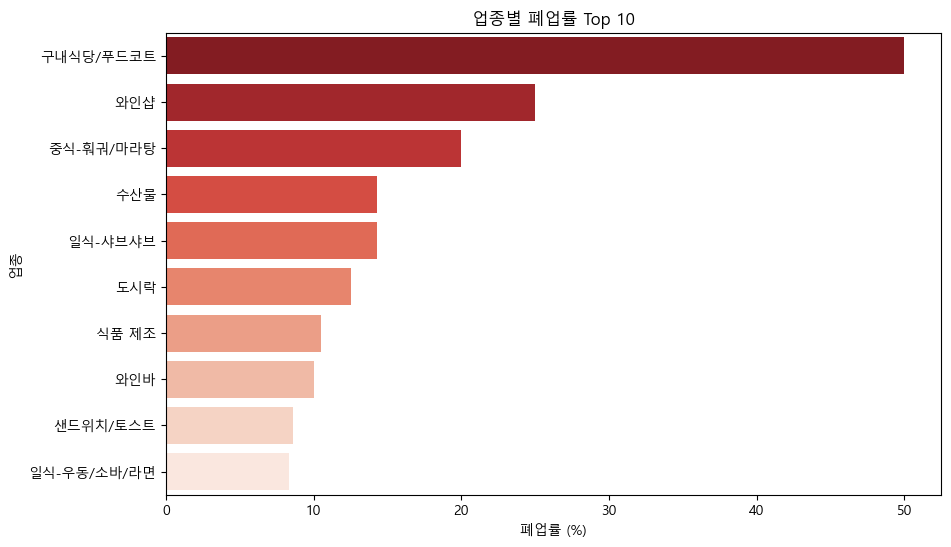

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_2768\2290452865.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_market, x="폐업률(%)", y="HPSN_MCT_BZN_CD_NM", palette="Blues_r")


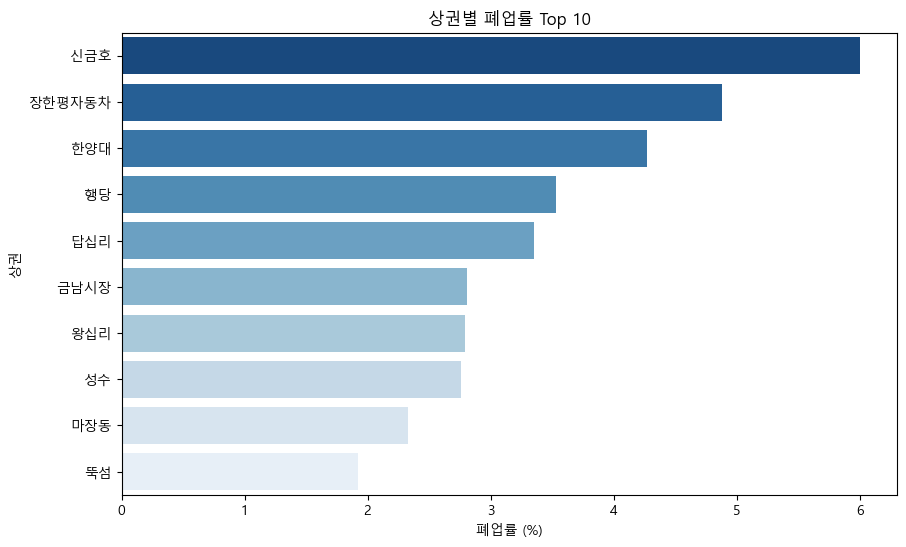

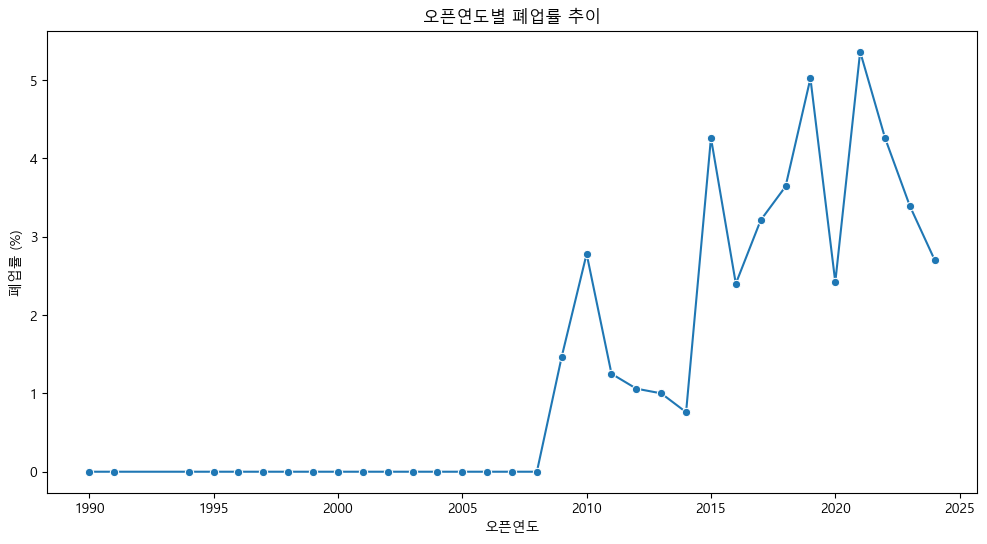

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_2768\2290452865.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="폐업여부", y="운영기간(일)", palette="Set2")


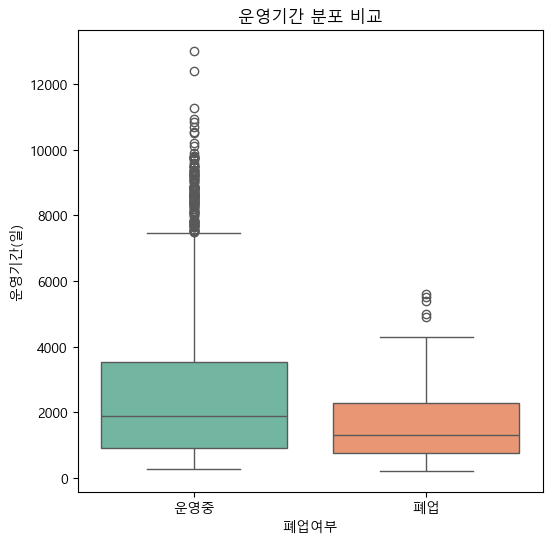

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_2768\2290452865.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=가맹점별, x="가맹점여부", y="폐업률(%)", palette="Set1")


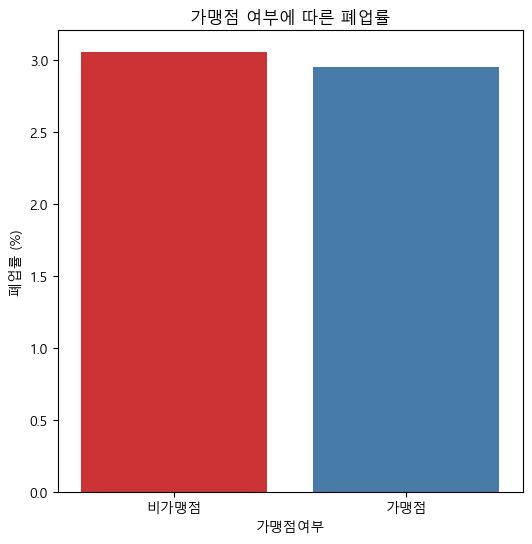

In [33]:
# 한글 폰트 깨짐 방지 (Windows 기준)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 1️⃣ 업종별 폐업률 (상위 10개)
top10_industry = 업종별.sort_values("폐업률(%)", ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top10_industry, x="폐업률(%)", y="HPSN_MCT_ZCD_NM", palette="Reds_r")
plt.title("업종별 폐업률 Top 10")
plt.xlabel("폐업률 (%)")
plt.ylabel("업종")
plt.show()

# 2️⃣ 상권별 폐업률 (상위 10개)
top10_market = 상권별.sort_values("폐업률(%)", ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top10_market, x="폐업률(%)", y="HPSN_MCT_BZN_CD_NM", palette="Blues_r")
plt.title("상권별 폐업률 Top 10")
plt.xlabel("폐업률 (%)")
plt.ylabel("상권")
plt.show()

# 3️⃣ 오픈연도별 폐업률
plt.figure(figsize=(12,6))
sns.lineplot(data=연도별, x="오픈연도", y="폐업률(%)", marker="o")
plt.title("오픈연도별 폐업률 추이")
plt.xlabel("오픈연도")
plt.ylabel("폐업률 (%)")
plt.show()

# 4️⃣ 운영기간 비교 (운영중 vs 폐업)
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x="폐업여부", y="운영기간(일)", palette="Set2")
plt.xticks([0,1], ["운영중", "폐업"])
plt.title("운영기간 분포 비교")
plt.show()

# 5️⃣ 가맹점 vs 비가맹점 폐업률
plt.figure(figsize=(6,6))
sns.barplot(data=가맹점별, x="가맹점여부", y="폐업률(%)", palette="Set1")
plt.xticks([0,1], ["비가맹점", "가맹점"])
plt.title("가맹점 여부에 따른 폐업률")
plt.ylabel("폐업률 (%)")
plt.show()

### 폐업가게 or 운영중 가게 운영 평균일 구하기

In [34]:
# 폐업 가게 평균 운영 기간
폐업평균일 = df.loc[df["폐업여부"] == 1, "운영기간(일)"].mean()
폐업평균년 = round(폐업평균일 / 365, 1)

print(f"폐업한 가게들의 평균 운영기간: {폐업평균일:.0f}일 (약 {폐업평균년}년)")

# 운영중인 가게 평균 운영 기간
운영중평균일 = df.loc[df["폐업여부"] == 0, "운영기간(일)"].mean()
운영중평균년 = round(운영중평균일 / 365, 1)

print(f"운영중인 가게들의 평균 운영기간: {운영중평균일:.0f}일 (약 {운영중평균년}년)")


폐업한 가게들의 평균 운영기간: 1657일 (약 4.5년)
운영중인 가게들의 평균 운영기간: 2552일 (약 7.0년)


-> 이거대로라면 4.5년이 대충 마지노선 같은건가?

### 업종별 평균 운영기간(폐업/운영중)

In [35]:
# 업종 + 폐업여부별 평균 운영일
업종별_평균 = (
    df.groupby(["HPSN_MCT_ZCD_NM", "폐업여부"])["운영기간(일)"]
      .mean()
      .reset_index()
)

# 연 단위도 추가
업종별_평균["평균운영기간(년)"] = (업종별_평균["운영기간(일)"] / 365).round(1)

# 폐업/운영 여부를 보기 좋게 이름 붙이기
업종별_평균["상태"] = 업종별_평균["폐업여부"].map({0: "운영중", 1: "폐업"})

print(업종별_평균.head(10))


  HPSN_MCT_ZCD_NM  폐업여부      운영기간(일)  평균운영기간(년)   상태
0            건강식품     0  4237.666667       11.6  운영중
1             건강원     0  5140.777778       14.1  운영중
2             건어물     0  4956.000000       13.6  운영중
3       구내식당/푸드코트     0  1099.000000        3.0  운영중
4       구내식당/푸드코트     1   663.000000        1.8   폐업
5            기사식당     0  4443.000000       12.2  운영중
6          기타세계요리     0  1238.545455        3.4  운영중
7          기타세계요리     1   532.000000        1.5   폐업
8            꼬치구이     0  2867.071429        7.9  운영중
9             농산물     0  2362.762712        6.5  운영중


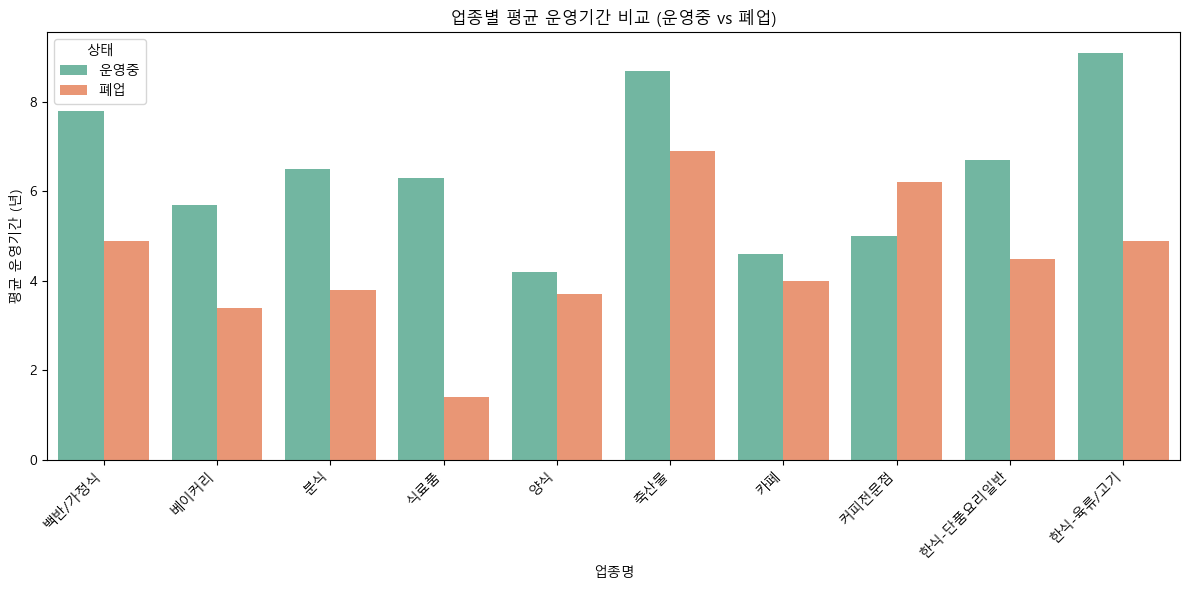

In [36]:
업종별_평균 = (
    df.groupby(["HPSN_MCT_ZCD_NM", "폐업여부"])["운영기간(일)"]
      .mean()
      .reset_index()
)
업종별_평균["평균운영기간(년)"] = (업종별_평균["운영기간(일)"] / 365).round(1)
업종별_평균["상태"] = 업종별_평균["폐업여부"].map({0: "운영중", 1: "폐업"})

# 상위 N개 업종 선택 (총업체 수 기준)
topN = (
    df["HPSN_MCT_ZCD_NM"].value_counts()
    .head(10)  # 여기서 10 대신 원하는 숫자 넣어도 돼
    .index
)
plot_data = 업종별_평균[업종별_평균["HPSN_MCT_ZCD_NM"].isin(topN)]

# 시각화
plt.figure(figsize=(12,6))
sns.barplot(
    data=plot_data,
    x="HPSN_MCT_ZCD_NM",
    y="평균운영기간(년)",
    hue="상태",
    palette="Set2"
)
plt.title("업종별 평균 운영기간 비교 (운영중 vs 폐업)")
plt.xlabel("업종명")
plt.ylabel("평균 운영기간 (년)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="상태")
plt.tight_layout()
plt.show()

### 폐업가게 폐업연도 분포

1. 폐업한 가게들이 언제 폐업했는지(23~25년 사이에)

In [46]:
# 폐업한 가게만 추출
폐업가게 = df[df["폐업여부"] == 1].copy()

# 폐업연도 추출
폐업가게["폐업연도"] = 폐업가게["폐업일"].dt.year

# 폐업연도별 폐업 가게 수
폐업연도별 = (
    폐업가게.groupby("폐업연도")["ENCODED_MCT"]  # 가게 수 세기 (고유 ID 사용)
    .count()
    .reset_index()
    .rename(columns={"ENCODED_MCT": "폐업가게수"})
)

print(폐업연도별.head())


   폐업연도  폐업가게수
0  2023     15
1  2024     15
2  2025     97


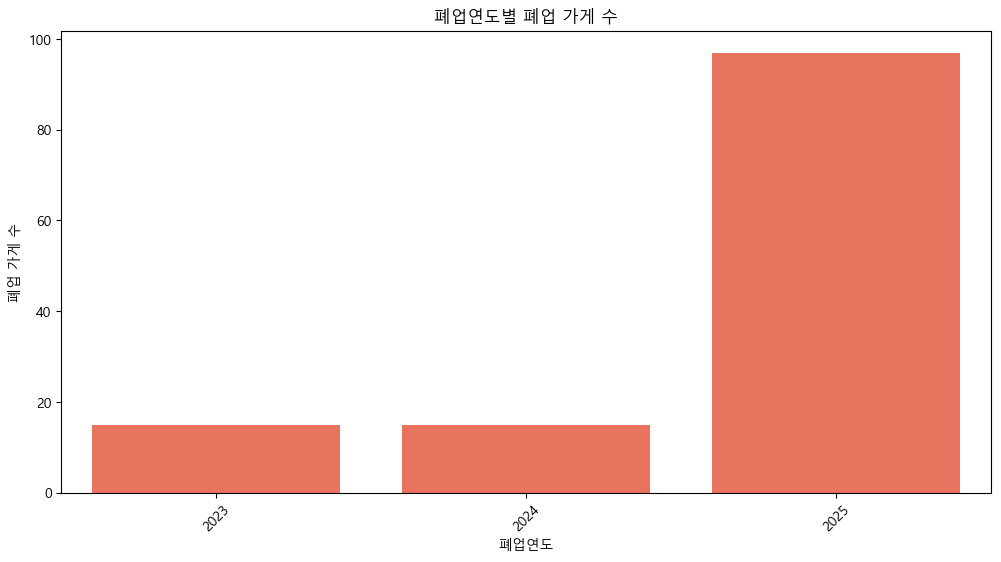

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=폐업연도별,
    x="폐업연도",
    y="폐업가게수",
    color="tomato"
)
plt.title("폐업연도별 폐업 가게 수")
plt.xlabel("폐업연도")
plt.ylabel("폐업 가게 수")
plt.xticks(rotation=45)
plt.show()

2. 오픈연도/폐업연도 분포 추이

In [39]:
# 폐업한 가게만 추출
폐업가게 = df[df["폐업여부"] == 1].copy()

# 오픈연도 & 폐업연도 추출
폐업가게["오픈연도"] = 폐업가게["오픈일"].dt.year
폐업가게["폐업연도"] = 폐업가게["폐업일"].dt.year


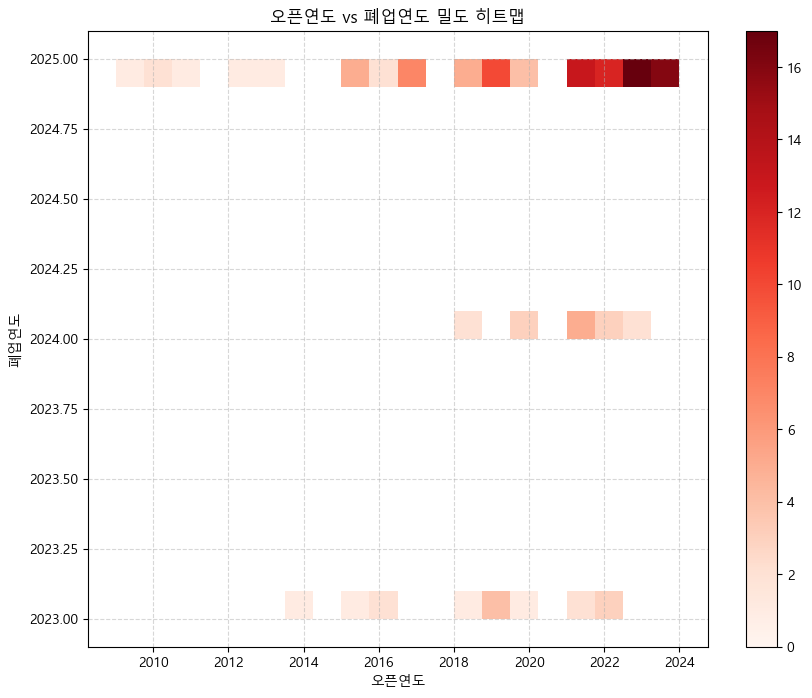

In [41]:
# 폐업한 가게만 추출
폐업가게 = df[df["폐업여부"] == 1].copy()
폐업가게["오픈연도"] = 폐업가게["오픈일"].dt.year
폐업가게["폐업연도"] = 폐업가게["폐업일"].dt.year

plt.figure(figsize=(10,8))
sns.histplot(
    data=폐업가게,
    x="오픈연도",
    y="폐업연도",
    bins=(20, 20), # 가로세로 bin 수
    cbar=True,
    cmap="Reds"
)

plt.title("오픈연도 vs 폐업연도 밀도 히트맵")
plt.xlabel("오픈연도")
plt.ylabel("폐업연도")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

3. 폐업연도별 평균 운영기간(년), 폐업연도별 폐업 가게 수

In [44]:
# 폐업한 가게만
폐업가게 = df[df["폐업여부"] == 1].copy()
폐업가게["폐업연도"] = 폐업가게["폐업일"].dt.year

# 폐업연도별 집계
연도별_집계 = (
    폐업가게.groupby("폐업연도")
    .agg(
        폐업가게수=("ENCODED_MCT", "count"),
        평균운영일=("운영기간(일)", "mean")
    )
    .reset_index()
)

# 평균일 → 년으로 변환
연도별_집계["평균운영년"] = (연도별_집계["평균운영일"] / 365).round(1)

print(연도별_집계)


   폐업연도  폐업가게수        평균운영일  평균운영년
0  2023     15  1539.800000    4.2
1  2024     15  1161.200000    3.2
2  2025     97  1751.381443    4.8
